# Create a solenoid fieldmap from on-axis data

In [1]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6,6)
%config InlineBackend.figure_format = 'retina'

In [2]:
import numpy as np
import os

In [3]:
# Here is some on-axis data

BDAT = '../templates/solenoid/newSOL.dat'

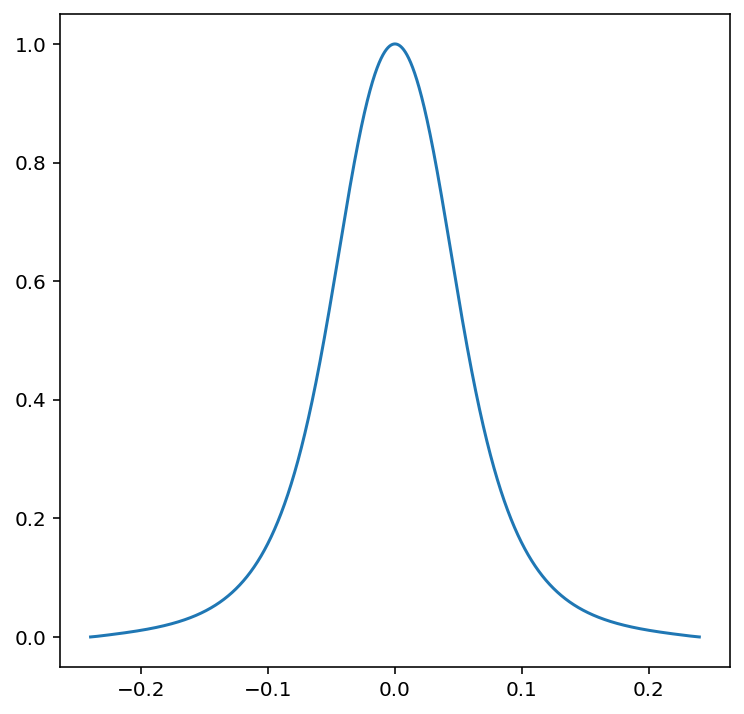

In [4]:
DAT = np.loadtxt(BDAT).T
Z, BZ = DAT[0], DAT[1]/DAT[1].max()
plt.plot(Z, BZ)

In [5]:
from impact import fieldmaps
?fieldmaps.create_fourier_coefficients

Signature: fieldmaps.create_fourier_coefficients(zdata, edata, n=None)
Docstring:
Literal transcription of Ji's routine RFcoeflcls.f90

Fixes bug with scaling the field by the max or min seen.

Vectorized two loops
File:      ~/Code/GitHub/lume-impact/impact/fieldmaps.py
Type:      function


In [6]:
fcoefs = fieldmaps.create_fourier_coefficients(Z, BZ, n=20)
fcoefs

The RF data number is:  10000 0.48 0.0 4.8004800480048006e-05


array([ 5.37354893e-01,  4.05516997e-01, -1.55759836e-16,  2.04379467e-01,
       -1.78204286e-16,  8.81883316e-02, -2.41270838e-16,  2.99003566e-02,
       -1.10986607e-16,  8.10303602e-03,  9.27642743e-18, -3.45710772e-04,
        1.51301664e-16, -1.50604206e-03,  3.14480119e-16, -1.68474134e-03,
        2.79482169e-16, -7.49635169e-04,  9.59858704e-17, -5.23107374e-04,
       -2.51071349e-16, -3.07452083e-05, -3.45646515e-16, -8.13636798e-05,
       -3.08758399e-16,  1.04174897e-04, -5.61523614e-17, -2.26376317e-05,
        2.52904963e-16,  7.35168661e-05,  3.93435646e-16, -3.22099922e-05,
        2.80446052e-16,  4.15843272e-05,  3.05639924e-17, -3.41770459e-05,
       -2.50183078e-16,  2.86108810e-05, -3.15781450e-16])

In [7]:
# Get basic placement
zmin, zmax = Z.min(), Z.max()
Ltot = zmax - zmin
zmin, zmax, Ltot

(-0.24, 0.24, 0.48)

In [8]:
# Create a lume-impact style fieldmap
fmap = {'Ez': {'z0': 0.0, 'z1': 0.0, 'L': 0.0, 'fourier_coefficients': np.array([0.])},
 'Bz': {'z0': 0,
  'z1': Ltot,
  'L': Ltot,
  'fourier_coefficients': fcoefs }}

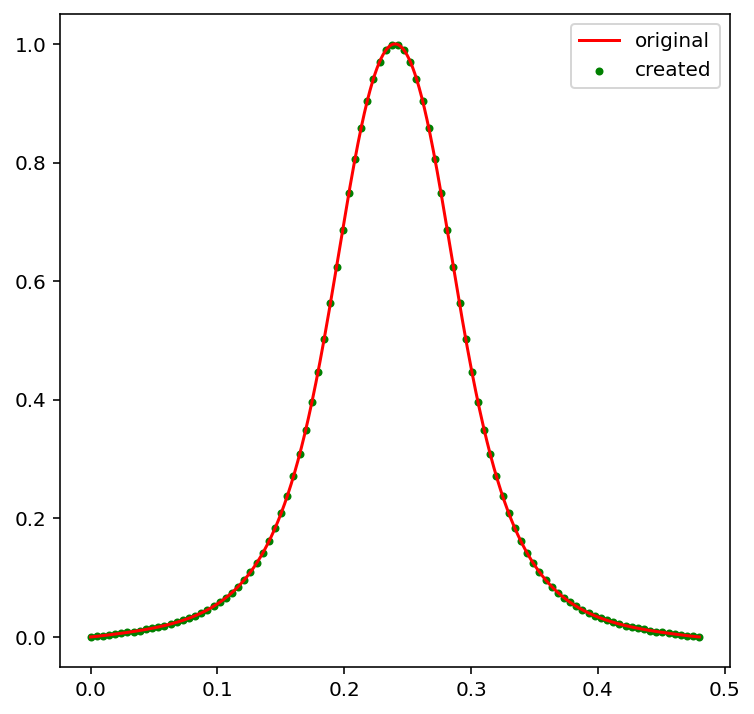

In [9]:
# Check the reconstruction
zlist = np.linspace(0, Ltot, 100)

fieldlist2 = [fieldmaps.fieldmap_reconsruction(fmap['Bz'], z) for z in zlist]

plt.scatter(zlist, fieldlist2, marker='.', color='green', label='created')
plt.plot(Z-Z.min(), BZ, color='red', label='original')
plt.legend()

# Write back into Impact-T rfdata format

In [10]:
rfdata = fieldmaps.raw_fieldmap_processed_fieldmap(fmap)    
rfdata

{'info': {'format': 'rfdata'},
 'data': array([ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  3.90000000e+01,  0.00000000e+00,  4.80000000e-01,
         4.80000000e-01,  5.37354893e-01,  4.05516997e-01, -1.55759836e-16,
         2.04379467e-01, -1.78204286e-16,  8.81883316e-02, -2.41270838e-16,
         2.99003566e-02, -1.10986607e-16,  8.10303602e-03,  9.27642743e-18,
        -3.45710772e-04,  1.51301664e-16, -1.50604206e-03,  3.14480119e-16,
        -1.68474134e-03,  2.79482169e-16, -7.49635169e-04,  9.59858704e-17,
        -5.23107374e-04, -2.51071349e-16, -3.07452083e-05, -3.45646515e-16,
        -8.13636798e-05, -3.08758399e-16,  1.04174897e-04, -5.61523614e-17,
        -2.26376317e-05,  2.52904963e-16,  7.35168661e-05,  3.93435646e-16,
        -3.22099922e-05,  2.80446052e-16,  4.15843272e-05,  3.05639924e-17,
        -3.41770459e-05, -2.50183078e-16,  2.86108810e-05, -3.15781450e-16])}

In [11]:
# This simply writes 'data' this to a file
fieldmaps.write_fieldmap_rfdata('../templates/solenoid/rfdata666', rfdata)

In [12]:
zcenter = 0.24653 # Intended center

ele = {'description': 'name:SOL1B',
 'L': Ltot,
 'type': 'solrf',
 'zedge': zcenter + zmin,
 'rf_field_scale': 0.0,
 'rf_frequency': 0.0,
 'theta0_deg': 0.0,
 'filename': 'rfdata666',
 'radius': 0.15,
 'x_offset': 0.0,
 'y_offset': 0.0,
 'x_rotation': 0.0,
 'y_rotation': 0.0,
 'z_rotation': 0.0,
 'solenoid_field_scale': 0.057,
 'name': 'SOL1'}
ele

{'description': 'name:SOL1B',
 'L': 0.48,
 'type': 'solrf',
 'zedge': 0.006530000000000008,
 'rf_field_scale': 0.0,
 'rf_frequency': 0.0,
 'theta0_deg': 0.0,
 'filename': 'rfdata666',
 'radius': 0.15,
 'x_offset': 0.0,
 'y_offset': 0.0,
 'x_rotation': 0.0,
 'y_rotation': 0.0,
 'z_rotation': 0.0,
 'solenoid_field_scale': 0.057,
 'name': 'SOL1'}

In [13]:
import impact
# This is the line to add to ImpactT.in
impact.lattice.ele_line(ele)

'0.48 0 0 105 0.006530000000000008 0.0 0.0 0.0 666 0.15 0.0 0.0 0.0 0.0 0.0 0.057 /!name:SOL1'